In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Dataset

This is the "Facebook Comment Volume Dataset" - https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset.

- The dataset comes in 5 different variants. Each of these variants represents a base time for collection. I chose to only work with the first one : "Features_Variant_1"
- There are 54 attributes, one being the target output
- As the columns have no tags, let's add names to the attributes, as given on the UCI  website 
    - All the names are derived from their explanation in the papers related to the article (available in the presentation)


In [3]:
names=['page_likes','page_checkins','page_talking','page_category',
         'cc1_min','cc1_max','cc1_avg','cc1_med','cc1_std',
         'cc2_min','cc2_max','cc2_avg','cc2_med','cc2_std',
         'cc3_min','cc3_max','cc3_avg','cc3_med','cc3_std',
         'cc4_min','cc4_max','cc4_avg','cc4_med','cc4_std',
         'cc5_min','cc5_max','cc5_avg','cc5_med','cc5_std',
         'CC1','CC2','CC3','CC4','CC5',
         'base_time','post_length','post_share_count','post_promotion_status',
         'hour_local',
         'post_pub_sunday','post_pub_monday','post_pub_tuesday','post_pub_wednesday','post_pub_thursday','post_pub_friday','post_pub_saturday',
         'base_date_sunday','base_date_monday','base_date_tuesday','base_date_wednesday','base_date_thursday','base_date_friday','base_date_saturday',
         'target'
        ]
data = 'Data/Features_Variant_1.csv'
df = pd.read_csv(data,header=None,names=names)
df.head()

,page_likes,page_checkins,page_talking,page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,post_pub_friday,post_pub_saturday,base_date_sunday,base_date_monday,base_date_tuesday,base_date_wednesday,base_date_thursday,base_date_friday,base_date_saturday,target
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   page_likes             40949 non-null  int64  
 1   page_checkins          40949 non-null  int64  
 2   page_talking           40949 non-null  int64  
 3   page_category          40949 non-null  int64  
 4   cc1_min                40949 non-null  float64
 5   cc1_max                40949 non-null  float64
 6   cc1_avg                40949 non-null  float64
 7   cc1_med                40949 non-null  float64
 8   cc1_std                40949 non-null  float64
 9   cc2_min                40949 non-null  float64
 10  cc2_max                40949 non-null  float64
 11  cc2_avg                40949 non-null  float64
 12  cc2_med                40949 non-null  float64
 13  cc2_std                40949 non-null  float64
 14  cc3_min                40949 non-null  float64
 15  cc

We seem to be dealing with only numerical values.

- 15 features are binary
    - post_pub_sunday/.../post_pub_saturday
    - base_date_sunday/.../base_date_saturday
- One is categorical
    - page_category
- The others are continuous

In [5]:
df.isna().any()

page_likes               False
page_checkins            False
page_talking             False
page_category            False
cc1_min                  False
cc1_max                  False
cc1_avg                  False
cc1_med                  False
cc1_std                  False
cc2_min                  False
cc2_max                  False
cc2_avg                  False
cc2_med                  False
cc2_std                  False
cc3_min                  False
cc3_max                  False
cc3_avg                  False
cc3_med                  False
cc3_std                  False
cc4_min                  False
cc4_max                  False
cc4_avg                  False
cc4_med                  False
cc4_std                  False
cc5_min                  False
cc5_max                  False
cc5_avg                  False
cc5_med                  False
cc5_std                  False
CC1                      False
CC2                      False
CC3                      False
CC4     

There are no missing values.

In [6]:
df.describe()

,page_likes,page_checkins,page_talking,page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,post_pub_friday,post_pub_saturday,base_date_sunday,base_date_monday,base_date_tuesday,base_date_wednesday,base_date_thursday,base_date_friday,base_date_saturday,target
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,...,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,...,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


The 'post_promotion_status' feature doesn't seem useful, so let's get rid of it.

In [7]:
df = df.drop(columns = "post_promotion_status")
df.head()

,page_likes,page_checkins,page_talking,page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,post_pub_friday,post_pub_saturday,base_date_sunday,base_date_monday,base_date_tuesday,base_date_wednesday,base_date_thursday,base_date_friday,base_date_saturday,target
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


Now, let's check what how our data is spread. We are interested in the distribution of :
- The page attributes
- The post attributes
    - Main ones
    - The counting and target values
    - The date and hour values

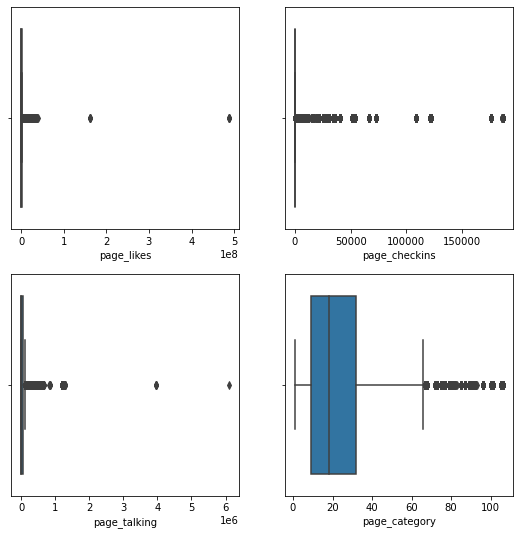

In [8]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(9,9))

sns.boxplot(data = df, x = "page_likes", ax=axs[0][0])
sns.boxplot(data = df, x = "page_checkins", ax=axs[0][1])
sns.boxplot(data = df, x = "page_talking", ax=axs[1][0])
sns.boxplot(data = df, x = "page_category", ax=axs[1][1])

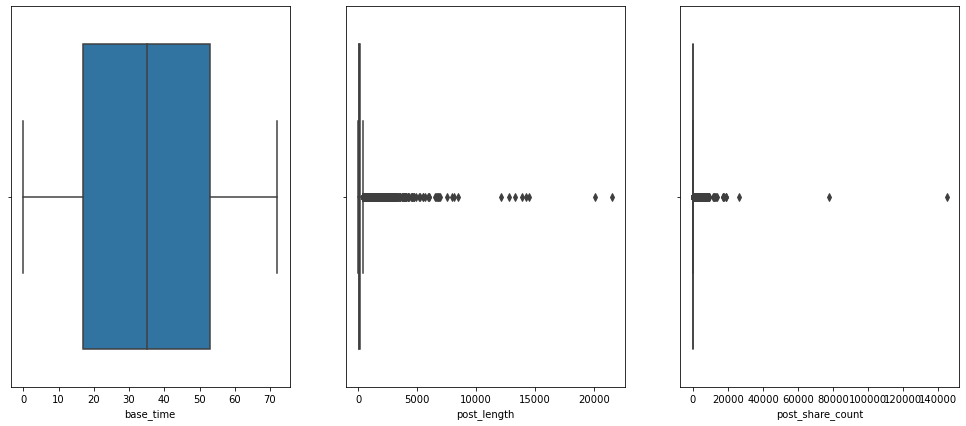

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))

sns.boxplot(data = df, x = "base_time", ax=ax1)
sns.boxplot(data = df, x = "post_length", ax=ax2)
sns.boxplot(data = df, x = "post_share_count", ax=ax3)

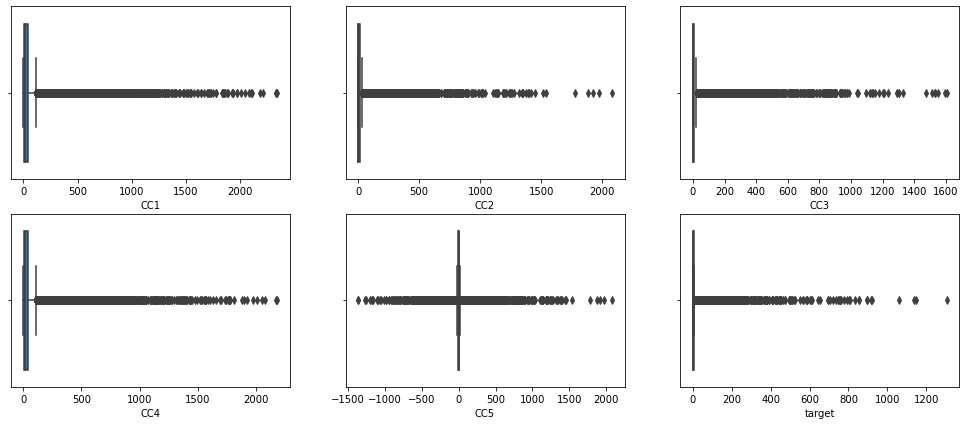

In [10]:
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(17,7))

sns.boxplot(data = df, x = "CC1", ax=axs[0][0])
sns.boxplot(data = df, x = "CC2", ax=axs[0][1])
sns.boxplot(data = df, x = "CC3", ax=axs[0][2])
sns.boxplot(data = df, x = "CC4", ax=axs[1][0])
sns.boxplot(data = df, x = "CC5", ax=axs[1][1])
sns.boxplot(data = df, x = "target", ax=axs[1][2])

We can conclude that our data comes in many different forms. It is quite visible to notice the disparity and variety in scale, distribution and density between all the different variables.

# Data Visualization

## Let's understand the data

### Number of posts per day

In [11]:
posts_per_day = list()

In [12]:
posts_per_day.append(df["post_pub_sunday"].sum())
posts_per_day.append(df["post_pub_monday"].sum())
posts_per_day.append(df["post_pub_tuesday"].sum())
posts_per_day.append(df["post_pub_wednesday"].sum())
posts_per_day.append(df["post_pub_thursday"].sum())
posts_per_day.append(df["post_pub_friday"].sum())
posts_per_day.append(df["post_pub_saturday"].sum())

In [13]:
posts_per_day

[5010, 5868, 6132, 6449, 5898, 5985, 5607]

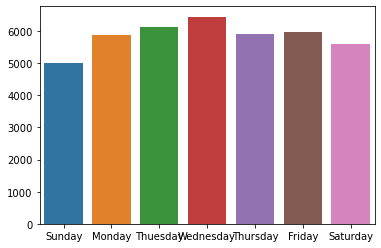

In [14]:
sns.barplot(y = posts_per_day, x=['Sunday','Monday','Thuesday','Wednesday','Thursday','Friday','Saturday'])

The difference between the different days of the week is relatively small, even though there seem to be low and high peaks, respectively on Sundays and Wednesdays.

### Categories

How many categories are there ? Which are the most and less active ones ?

In [15]:
df.page_category.value_counts()

9     7494
24    4511
18    4301
36    2387
16    1890
      ... 
62      16
63       4
58       2
93       1
83       1
Name: page_category, Length: 81, dtype: int64

There are 81 different categories. The ninth is the most frequent.

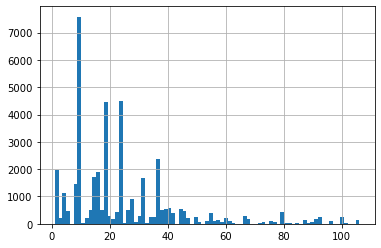

In [16]:
df.page_category.hist(bins=81)

### Correlation between variables and the target

In [17]:
correlation = df.corr()
correlation['target'].sort_values(ascending=False)

target                 1.000000
CC2                    0.528696
CC5                    0.378453
cc2_avg                0.344827
CC4                    0.341741
cc1_avg                0.334986
cc4_avg                0.333990
CC1                    0.326882
cc1_med                0.325367
cc4_med                0.324373
cc3_avg                0.317867
cc2_med                0.309461
cc5_std                0.308800
cc1_std                0.300229
cc2_std                0.297203
cc3_std                0.296790
cc4_std                0.295221
cc3_med                0.276432
cc1_max                0.231432
cc3_max                0.229884
cc4_max                0.225908
cc2_max                0.217754
cc5_max                0.213866
page_talking           0.177330
cc4_min                0.164300
cc5_avg                0.162492
cc1_min                0.156940
post_share_count       0.139295
cc2_min                0.103345
CC3                    0.072088
page_likes             0.058918
page_che

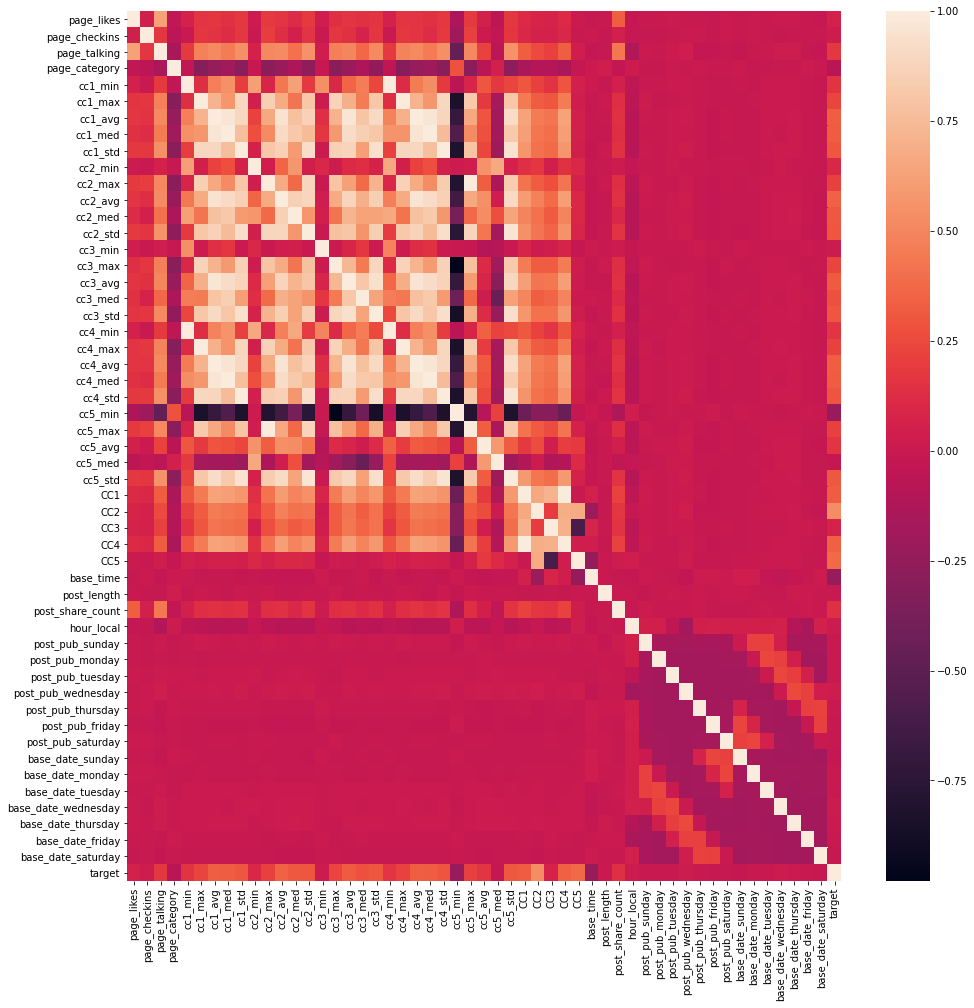

In [18]:
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(correlation, annot=False, ax=ax)
plt.show()

As we can see, all the derived variables create zones of rich correlation both with the others variables, but also with the target.

### Correlation between the days of the week of publishing and the target

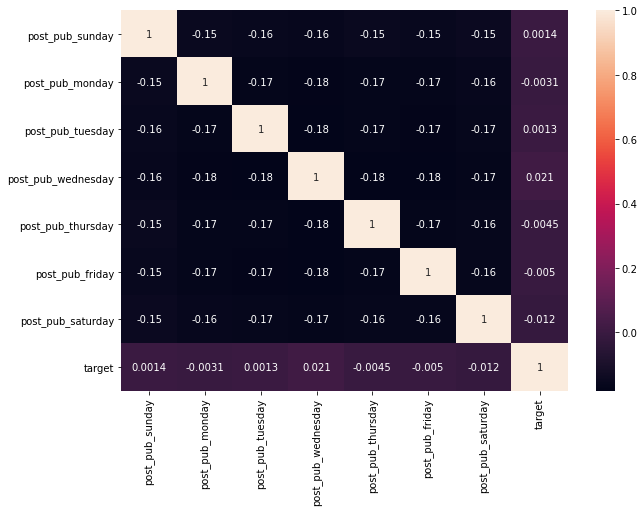

In [19]:
f,ax = plt.subplots(figsize=(10, 7))

week_days_pub_corr = ["post_pub_sunday", "post_pub_monday", "post_pub_tuesday", "post_pub_wednesday",
                      "post_pub_thursday", "post_pub_friday", "post_pub_saturday", "target"]

correlation_week_days_pub = df[week_days_pub_corr].corr()
correlation_week_days_pub['target'].sort_values(ascending=False)
sns.heatmap(correlation_week_days_pub, annot=True, ax=ax)
plt.show()

It quite clearly doesn't seem to make much of a difference if a post is published on any specific day.

### Correlation between the base_time days of the week and the target

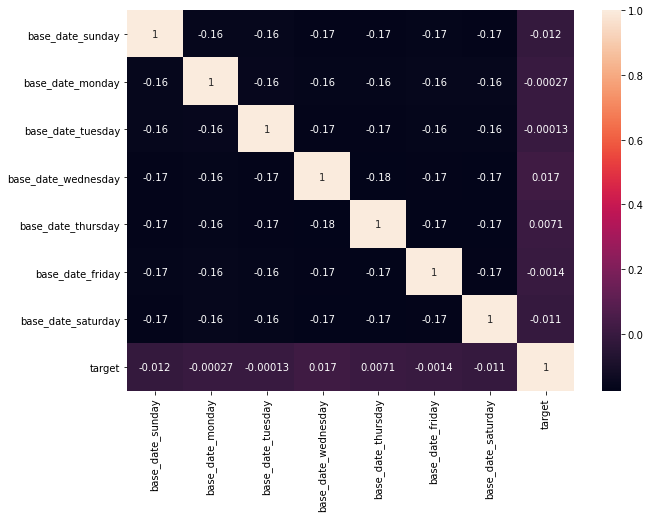

In [20]:
f,ax = plt.subplots(figsize=(10, 7))

week_days_pub_corr = ["base_date_sunday", "base_date_monday", "base_date_tuesday", "base_date_wednesday",
                      "base_date_thursday", "base_date_friday", "base_date_saturday", "target"]

correlation_week_days_pub = df[week_days_pub_corr].corr()
correlation_week_days_pub['target'].sort_values(ascending=False)
sns.heatmap(correlation_week_days_pub, annot=True, ax=ax)
plt.show()

The results are practically identical, poor correlation.

##  Normalizing and scattering

By normalizing, we can use scattering for data visualization.

In [21]:
temp_norm =  preprocessing.normalize(df,axis= 1, copy= True)
df_norm = pd.DataFrame(temp_norm)
df_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
count,40949.000000,40949.000000,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,4.094900e+04,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,0.983812,0.025267,0.058903,2.217903e-03,0.000008,0.002787,0.000311,0.000179,0.000434,6.565721e-07,...,0.000010,0.000010,0.000010,0.000009,0.000012,0.000013,0.000011,0.000011,0.000010,0.000042
std,0.067383,0.116617,0.081969,1.217792e-02,0.000256,0.008208,0.000954,0.000683,0.001181,7.319091e-05,...,0.000111,0.000118,0.000121,0.000103,0.000192,0.000186,0.000148,0.000144,0.000121,0.000477
min,0.047232,0.000000,0.000000,6.148958e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.994518,0.000000,0.007092,8.974377e-06,0.000000,0.000291,0.000036,0.000009,0.000050,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.999174,0.000000,0.030617,7.406778e-05,0.000000,0.000776,0.000085,0.000038,0.000111,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.999874,0.000198,0.072375,6.367665e-04,0.000000,0.002274,0.000250,0.000126,0.000338,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
max,1.000000,0.988438,0.566954,7.053838e-01,0.026099,0.103349,0.026099,0.026099,0.019514,1.304934e-02,...,0.005158,0.006187,0.006187,0.004974,0.021262,0.021482,0.009161,0.011600,0.008462,0.058601


In [22]:
names2=['page_likes','page_checkins','page_talking','page_category',
         'cc1_min','cc1_max','cc1_avg','cc1_med','cc1_std',
         'cc2_min','cc2_max','cc2_avg','cc2_med','cc2_std',
         'cc3_min','cc3_max','cc3_avg','cc3_med','cc3_std',
         'cc4_min','cc4_max','cc4_avg','cc4_med','cc4_std',
         'cc5_min','cc5_max','cc5_avg','cc5_med','cc5_std',
         'CC1','CC2','CC3','CC4','CC5',
         'base_time','post_length','post_share_count',
         'hour_local',
         'post_pub_sunday','post_pub_monday','post_pub_tuesday','post_pub_wednesday','post_pub_thursday','post_pub_friday','post_pub_saturday',
         'base_date_sunday','base_date_monday','base_date_tuesday','base_date_wednesday','base_date_thursday','base_date_friday','base_date_saturday',
         'target'
        ] #Sames column names as before, with 'post_promotion_status' removed

df_norm.columns = names2
df_norm.describe()

,page_likes,page_checkins,page_talking,page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,post_pub_friday,post_pub_saturday,base_date_sunday,base_date_monday,base_date_tuesday,base_date_wednesday,base_date_thursday,base_date_friday,base_date_saturday,target
count,40949.000000,40949.000000,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,4.094900e+04,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,0.983812,0.025267,0.058903,2.217903e-03,0.000008,0.002787,0.000311,0.000179,0.000434,6.565721e-07,...,0.000010,0.000010,0.000010,0.000009,0.000012,0.000013,0.000011,0.000011,0.000010,0.000042
std,0.067383,0.116617,0.081969,1.217792e-02,0.000256,0.008208,0.000954,0.000683,0.001181,7.319091e-05,...,0.000111,0.000118,0.000121,0.000103,0.000192,0.000186,0.000148,0.000144,0.000121,0.000477
min,0.047232,0.000000,0.000000,6.148958e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.994518,0.000000,0.007092,8.974377e-06,0.000000,0.000291,0.000036,0.000009,0.000050,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.999174,0.000000,0.030617,7.406778e-05,0.000000,0.000776,0.000085,0.000038,0.000111,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.999874,0.000198,0.072375,6.367665e-04,0.000000,0.002274,0.000250,0.000126,0.000338,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
max,1.000000,0.988438,0.566954,7.053838e-01,0.026099,0.103349,0.026099,0.026099,0.019514,1.304934e-02,...,0.005158,0.006187,0.006187,0.004974,0.021262,0.021482,0.009161,0.011600,0.008462,0.058601


### Comments, shares, likes

Let's analyze the next correlation :
- Number of comments depending on the page likes
- Number of shares depending on the page likes
- Number of comments depending on the number of shares

Text(0, 0.5, 'Number of comments')

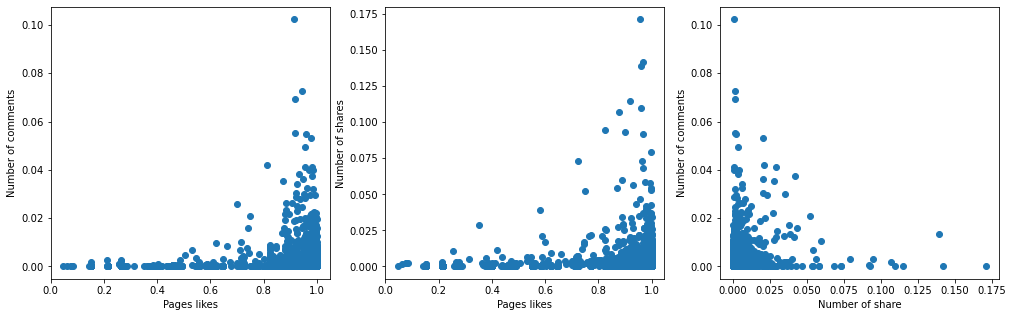

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (17,5))

ax1.scatter(df_norm.page_likes, df_norm.CC1)
ax1.set_xlabel('Pages likes')
ax1.set_ylabel('Number of comments')

ax2.scatter(df_norm.page_likes, df_norm.post_share_count)
ax2.set_xlabel('Pages likes')
ax2.set_ylabel('Number of shares')

ax3.scatter(df_norm.post_share_count, df_norm.CC1)
ax3.set_xlabel('Number of share')
ax3.set_ylabel('Number of comments')

As we can see :
- As expected, the number of comments significantly depends on the number of likes the page has
- Same thing, as expected, for the shares
- Also not a surprise, the number of comments and shares are strongly influencing each other

# Models

We are trying to predict the number of comments on a post. It is a regression problem.

Let's reload the data, clean it and split it.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [25]:
data = 'Data/Features_Variant_1.csv'
df = pd.read_csv(data,header=None,names=names)
df.drop(columns = "post_share_count")
Y = df['target']
X = df.drop(columns ="target")
print(Y.shape)
print(X.shape)

(40949,)
(40949, 53)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35)
print(len(x_train))
print(len(x_test))

26616
14333


### Display all the interesting information on the models

In [27]:
def display_res(y_test, y_pred):

  MAE = metrics.mean_absolute_error(y_test, y_pred)
  RMSE = sqrt(metrics.mean_squared_error(y_test, y_pred))
  R2 = metrics.r2_score(y_test, y_pred)

  print(f"- Mean absolute error : {MAE} \n- Root mean square error : {RMSE} \n- R2 Score : {R2}")

  plt.scatter(y_test, y_pred)
  plt.xlabel('Number of comments')
  plt.ylabel('Predicted number of comments')
  plt.axis('tight')
  plt.tight_layout()

  return {'MAE' : MAE, 'RMSE' : RMSE, 'R2 Score' : R2}

## Linear Regression

- Mean absolute error : 8.433202918940207 
- Root mean square error : 28.600999926079705 
- R2 Score : 0.31598700290199033


{'MAE': 8.433202918940207,
 'RMSE': 28.600999926079705,
 'R2 Score': 0.31598700290199033}

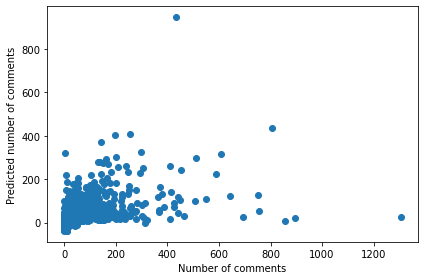

In [28]:
lr = linear_model.LinearRegression() 
lr.fit(x_train, y_train) 

y_pred_lr = lr.predict(x_test)

display_res(y_test, y_pred_lr)

## Random Forest

- Mean absolute error : 4.001114572787292 
- Root mean square error : 20.81577086740954 
- R2 Score : 0.6376844967823818


{'MAE': 4.001114572787292,
 'RMSE': 20.81577086740954,
 'R2 Score': 0.6376844967823818}

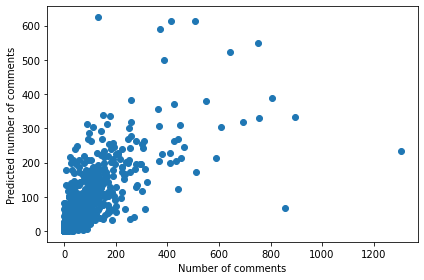

In [29]:
rf = RandomForestRegressor(n_estimators=134) #Best number of estimators according to the GridSearch down below
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

display_res(y_test, y_pred_rf)

## Gradient Boosting

- Mean absolute error : 4.349701491039349 
- Root mean square error : 21.47420476979698 
- R2 Score : 0.6144008211997869


{'MAE': 4.349701491039349,
 'RMSE': 21.47420476979698,
 'R2 Score': 0.6144008211997869}

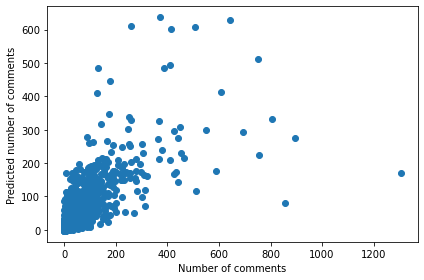

In [30]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

display_res(y_test, y_pred_gb)

## GridSearch

Let's use GridSearch to find the best parameters for our RandomForest model.

In [270]:
params={'n_estimators': [int(x) for x in np.linspace(start=10,stop=150,num=10)]}
grid=GridSearchCV(RandomForestRegressor(),params)
grid.fit(x_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.641416757481824 RandomForestRegressor(n_estimators=134)


The RandomForest has thus been modified with n_estimators=134, as suggested.

#### Wish is the best model ?

The best model is the Random Forest with n_estimators = 134.

# API

In [34]:
import pickle

ModelFile='model.pkl'

with open(ModelFile, 'wb') as file:
    pickle.dump(rf, file, protocol = 2) #Had to change it for compatibilty reasons
